In [20]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#READ the csv file and name it as diabetes_df
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check the datatype of the columns
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    768 non-null    int64 
 1   plas    768 non-null    object
 2   pres    768 non-null    object
 3   skin    768 non-null    object
 4   test    768 non-null    object
 5   mass    768 non-null    object
 6   pedi    768 non-null    object
 7   age     768 non-null    int64 
 8   class   768 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 54.1+ KB
None


In [4]:
#Replacing na values with 0 and tba values with 0
diabetes_df.replace({'na': '0', 'tba': '0'}, inplace=True)
#Replacing all the whitespace in between numbers that is causing an error
diabetes_df['pres'] = diabetes_df['pres'].str.replace(' ', '', regex=False)

In [5]:
#Converting columns with continuous data to float64
diabetes_df["mass"] = diabetes_df["mass"].astype('float64')
diabetes_df["pedi"] = diabetes_df["pedi"].astype('float64')

In [6]:
#Converting columns with discrete data to int64
diabetes_df['plas'] = diabetes_df['plas'].astype('int64')
diabetes_df['pres'] = diabetes_df['pres'].astype('int64')
diabetes_df['skin'] = diabetes_df['skin'].astype('int64')
diabetes_df['test'] = diabetes_df['test'].astype('int64')

In [7]:
#Check the datatype of the columns again
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
#Grab the median of all the columns in order to replace the 0 or NA Values
preg_median = round(diabetes_df["preg"].median(),0)
plas_median = diabetes_df["plas"].median()
pres_median = round(diabetes_df["pres"].median(),0)
skin_median = round(diabetes_df["skin"].median(),0)
test_median = round(diabetes_df["test"].median(),0)
age_median = round(diabetes_df["age"].median(),0)
class_median = round(diabetes_df["class"].median(),0) 

#Grab the median of mass which is 1 decimal place
mass_median = round(diabetes_df["mass"].median(),1)
#Grab the median of pedi which is 3 decimal places
pedi_median = round(diabetes_df["pedi"].median(),3)

In [9]:
#Replacing the 0 values with the column median
diabetes_df["preg"].replace(0, preg_median, inplace=True)
diabetes_df["plas"].replace(0, plas_median, inplace=True)
diabetes_df["pres"].replace(0, pres_median, inplace=True)
diabetes_df["skin"].replace(0, skin_median, inplace=True)
diabetes_df["test"].replace(0, test_median, inplace=True)
diabetes_df["age"].replace(0, age_median, inplace=True)
diabetes_df["class"].replace(0, class_median, inplace=True)

diabetes_df.head(10)

/tmp/ipykernel_3345/108432341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df["preg"].replace(0, preg_median, inplace=True)
/tmp/ipykernel_3345/108432341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,27,33.6,0.627,50,1
1,1,85,66,29,27,26.6,0.351,31,0
2,8,183,64,23,27,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1
5,5,116,74,23,27,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,23,27,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,23,27,0.0,0.232,54,1


In [10]:
#Replacing pedi and mass 0 values into their respective column median
diabetes_df['pedi'].replace(0.0, pedi_median, inplace=True)
diabetes_df['mass'].replace(0.0, mass_median, inplace=True)

/tmp/ipykernel_3345/3131220333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df['pedi'].replace(0.0, pedi_median, inplace=True)
/tmp/ipykernel_3345/3131220333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [11]:
#Printing the descriptive statistics
print(diabetes_df.describe())

             preg        plas        pres        skin      test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.0000  768.000000   
mean     4.278646  121.634115   72.394531   27.364583   92.8750   32.467969   
std      3.021516   30.401104   12.094449    9.195821  106.6202    6.864431   
min      1.000000   44.000000   24.000000    7.000000   14.0000   18.200000   
25%      2.000000   99.750000   64.000000   23.000000   27.0000   27.575000   
50%      3.000000  117.000000   72.000000   23.000000   28.0000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.2500   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.0000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.472060   33.240885    0.348958  
std      0.331247   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.373000   29.0

In [12]:
#Print Class Distribution
diabetes_df.groupby('class').size()

class
0    500
1    268
dtype: int64

In [13]:
#Print the Correlation Matrix
diabetes_df.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.148880,0.247515,0.058325,-0.061350,0.079389,-0.016601,0.538169,0.245466
plas,0.148880,1.000000,0.217581,0.166583,0.349325,0.230602,0.135797,0.266357,0.493289
pres,0.247515,0.217581,1.000000,0.141324,-0.028852,0.284287,-0.002963,0.324741,0.165280
skin,0.058325,0.166583,0.141324,1.000000,0.237084,0.544229,0.141191,0.051437,0.187362
test,-0.061350,0.349325,-0.028852,0.237084,1.000000,0.186249,0.179538,-0.018722,0.146793
mass,0.079389,0.230602,0.284287,0.544229,0.186249,1.000000,0.153167,0.023254,0.310926
pedi,-0.016601,0.135797,-0.002963,0.141191,0.179538,0.153167,1.000000,0.033157,0.173481
age,0.538169,0.266357,0.324741,0.051437,-0.018722,0.023254,0.033157,1.000000,0.238356
class,0.245466,0.493289,0.165280,0.187362,0.146793,0.310926,0.173481,0.238356,1.000000


In [14]:
#Print the skew distribution
diabetes_df_skew = diabetes_df.skew()
print(diabetes_df_skew)

preg     1.111795
plas     0.538626
pres     0.140212
skin     1.239987
test     2.644129
mass     0.600712
pedi     1.920006
age      1.129597
class    0.635017
dtype: float64


In [16]:
#diabetes_df.to_csv('modified.csv', index=False)

Text(0.5, 1.0, 'Correlation Heatmap of Diabetes Data')

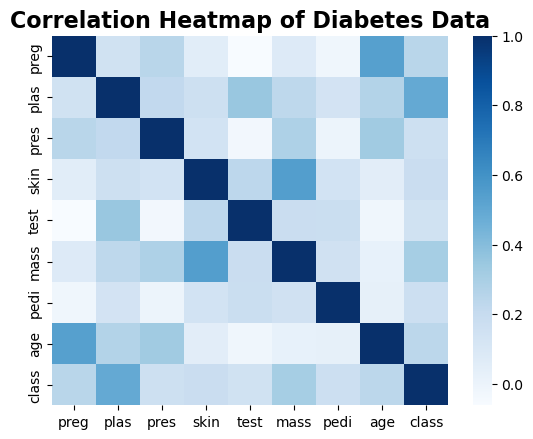

In [29]:
# plotting correlation heatmap
sns.heatmap(diabetes_df.corr(), cmap="Blues")
plt.title("Correlation Heatmap of Diabetes Data", fontweight='bold', fontsize=16)

/tmp/ipykernel_3345/4084010275.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df_skew,color="red", shade=True)


Text(0.5, 1.0, 'Skewness of Diabetes Data')

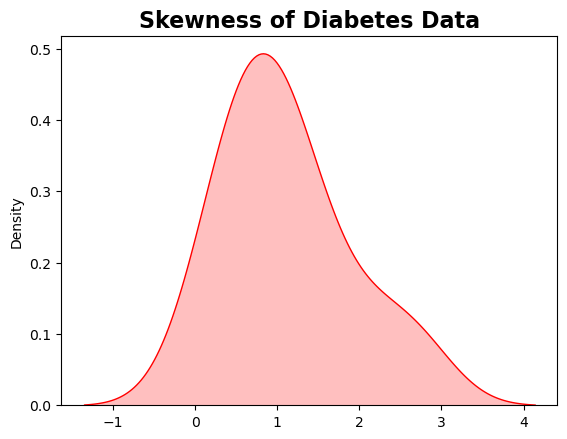

In [27]:
#diabetes_df["age"].skew()
sns.kdeplot(diabetes_df_skew,color="red", shade=True)
plt.title("Skewness of Diabetes Data", fontweight='bold', fontsize=16)